# Geodatenhandling 2

**Inhalt: ** Geopandas für Fortgeschrittene

**Nötige Skills**
- Basic pandas skills
- Funktionen und pandas
- Erste Schritte mit Geopandas
- Geodatenhandling 1

**Lernziele**
- Punkte, Linien, Polygone revisited
- Eigenschaften von geometrischen Shapes
- Shapes modifizieren und kombinieren
- Geodaten modifizieren und selektieren

## Das Beispiel

Geschäfte in Chicago.

Wir checken: In welchen Stadtteilen gibt es keine Lebensmittelläden, wo sind die "Food deserts"

- `Boundaries - Census Tracts - 2010.zip`, census tracts in Chicago from [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik)
- `Grocery_Stores_-_2013.csv`, grocery stores in Chicago from [here](https://data.cityofchicago.org/Community-Economic-Development/Grocery-Stores-2013/53t8-wyrc)

**Credits to:**
- http://www.jonathansoma.com/lede/foundations-2017/

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline

## Geometries

Zum Aufwärmen, nochmals ein paar Shapes from scratch

### Point (again)

In [2]:
punkt1 = Point(5, 5)

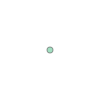

In [3]:
punkt1

### Line (again)

In [4]:
linie1 = LineString([Point(20, 0), Point(0, 20)])

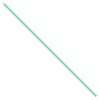

In [5]:
linie1

In [6]:
linie2 = LineString([Point(15, 0), Point(0, 15)])

In [7]:
linie3 = LineString([Point(25, 0), Point(0, 25)])

In [35]:
linie4 = LineString([Point(12, 37), Point(25, 0)])

### Polygon (again)

In [36]:
polygon1 = Polygon([[0, 0], [10, 0], [10, 10], [0, 10]])

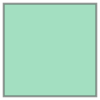

In [37]:
polygon1

In [42]:
polygon2 = Polygon([[10, 10], [5, 15], [0, 10]])

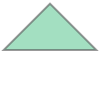

In [43]:
polygon2

In [44]:
gdfhaus = pd.DataFrame({'geometry': [polygon1, polygon2]})

In [45]:
gdfhaus

,geometry
0,"POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))"
1,"POLYGON ((10 10, 5 15, 0 10, 10 10))"


In [46]:
gdfhausneu = gpd.GeoDataFrame(gdfhaus, geometry='geometry')

**Let's plot it together!**

In [48]:
df = pd.DataFrame({'geometry': [punkt1, linie1, linie2, linie3, linie4, polygon1]})

In [49]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [50]:
gdf

,geometry
0,POINT (5.00000 5.00000)
1,"LINESTRING (20.00000 0.00000, 0.00000 20.00000)"
2,"LINESTRING (15.00000 0.00000, 0.00000 15.00000)"
3,"LINESTRING (25.00000 0.00000, 0.00000 25.00000)"
4,"LINESTRING (12.00000 37.00000, 25.00000 0.00000)"
5,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."


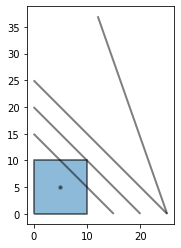

In [51]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

## Shapes vergleichen

Wir können geometrische Shapes auf verschiedene Weise miteinander "vergleichen".

* **contains:** has the other object TOTALLY INSIDE  (boundaries can't touch!!!) "a neighborhood CONTAINS restaurants"
* **intersects:** is OVERLAPPING at ALL, unless it's just boundaries touching
* **touches:** only the boundaries touch, like a tangent
* **within:** is TOTALLY INSIDE of the other object "a restaurant is WITHIN a neighborhood"
* **disjoint:** no touching!!! no intersecting!!!!
* **crosses:** goes through but isn't inside - "a river crossing through a city"

Referenz und weitere Vergleiche: http://geopandas.org/reference.html)

Das funktioniert ganz einfach:

In [52]:
polygon1.contains(punkt1)

True

In [53]:
punkt1.contains(polygon1)

False

**Quizfragen:**

In [54]:
#Liegt der Punkt 1 innerhalb von Polygon 1?
punkt1.within(polygon1)

True

In [55]:
#Berührt die Linie 1 das Polygon 1?
linie1.touches(polygon1)

True

In [56]:
#Überschneidet sich die Linie 3 mit dem Polygon 1?
linie3.intersects(polygon1)

False

In [57]:
#Überschneidet sich die Linie 2 mit dem Polygon 1?
linie2.intersects(polygon1)

True

In [58]:
#Ist das Polygon 1 völlig losgelöst von der Linie 3?
polygon1.disjoint(linie3)

True

## Import

Und nun zu unserem Beispiel:

**Ein Stadtplan von Chicago mit den Quartieren (census tracts)**

In [59]:
tracts = gpd.read_file("dataprojects/Food Deserts/Boundaries - Census Tracts - 2010/geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.shp")

In [60]:
tracts.head(2)

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."


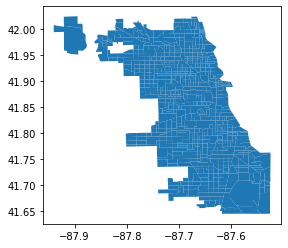

In [61]:
tracts.plot()

**Eine Liste aller Lebensmittelläden**

In [62]:
df = pd.read_csv("dataprojects/Food Deserts/Grocery_Stores_-_2013.csv")

In [63]:
df.head(2)

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,200 LIQUORS,48663.0,17055.0,5000.0,B,204 E 47TH ST,60653,GRAND BOULEVARD,38,3,17031381500,1.703138e+14,1.178462e+06,1.873949e+06,41.809424,-87.620952,"(41.8094238941, -87.6209518020)"
1,3600 COMMISSARY,24279.0,9830.0,3800.0,B,3600 N LAKE SHORE DR,60613,LAKE VIEW,6,46,17031060900,1.703106e+14,1.171866e+06,1.924645e+06,41.948684,-87.643650,"(41.9486836744, -87.6436497585)"


Um von Pandas zu Geopandas zu gelangen:
- Geometrie erstellen
- Geodataframe erstellen
- Koordinatensystem intialisieren

In [64]:
points = df.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1)

In [65]:
grocery_stores = gpd.GeoDataFrame(df, geometry=points)

In [66]:
grocery_stores.crs = {'init': 'epsg:4326'}

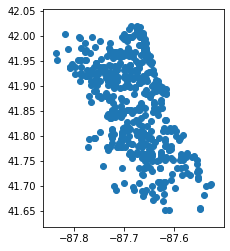

In [67]:
grocery_stores.plot()

**Wir plotten mal alles zusammen**

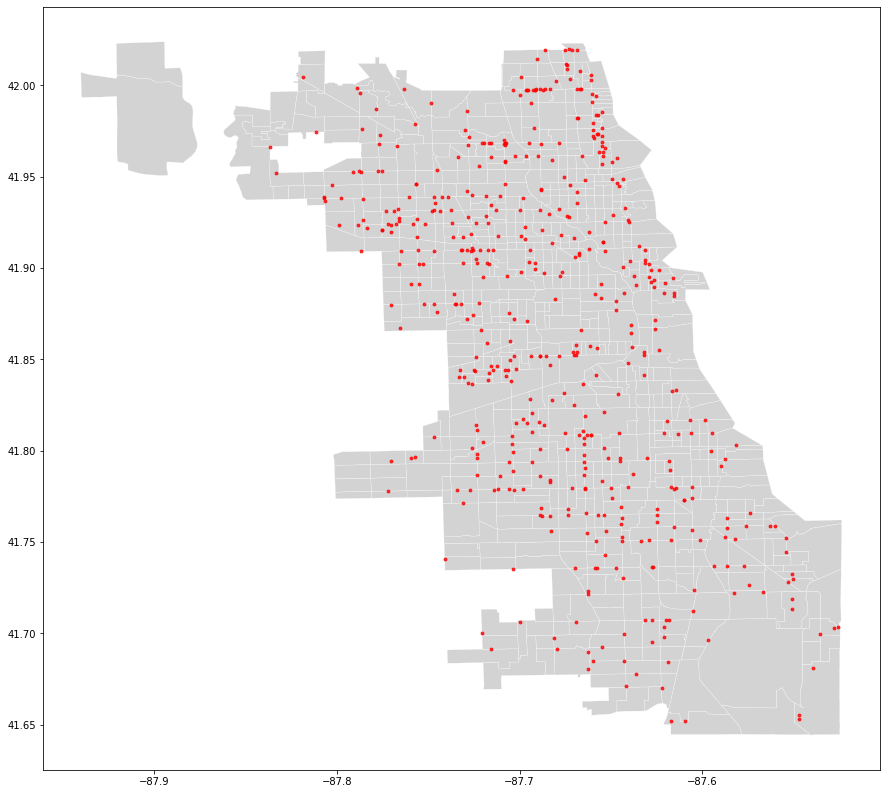

In [68]:
ax = tracts.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
grocery_stores.plot(ax=ax, color='red', markersize=8, alpha = 0.8)

## Analyse

Uns interessiert: Wo sind die Gebiete, in denen es in einem bestimmten Umkreis von Metern keine Lebensmittelläden gibt?

Um das zu beantworten, müssen wir zuerst in ein brauchbares Koordinatensystem wechseln, das auf Metern basiert.

### Projektion ändern

Wir entscheiden uns für eine Variante der Mercator-Projektion.
Das ist praktisch, weil:
- "Die wichtigste Eigenschaft der Mercator-Projektion ist ihre Winkeltreue. Diese bedeutet auch, dass in kleinen Bereichen der Längenmaßstab in allen Richtungen gleich ist." https://de.wikipedia.org/wiki/Mercator-Projektion
- Die Koordinaten sind nicht in Längen-/Breitengrad, sondern in Metern angegeben (die CH-Koordinaten sind auch eine Variante der Mercator-Projektion)

In [69]:
grocery_stores = grocery_stores.to_crs({'proj': 'merc'})
tracts = tracts.to_crs({'proj': 'merc'})

Andere Projektionen wären:
- 'tmerc': transverse mercator
- 'aea': albers equal area

**Wir haben nun ein neues Koordinatensystem**

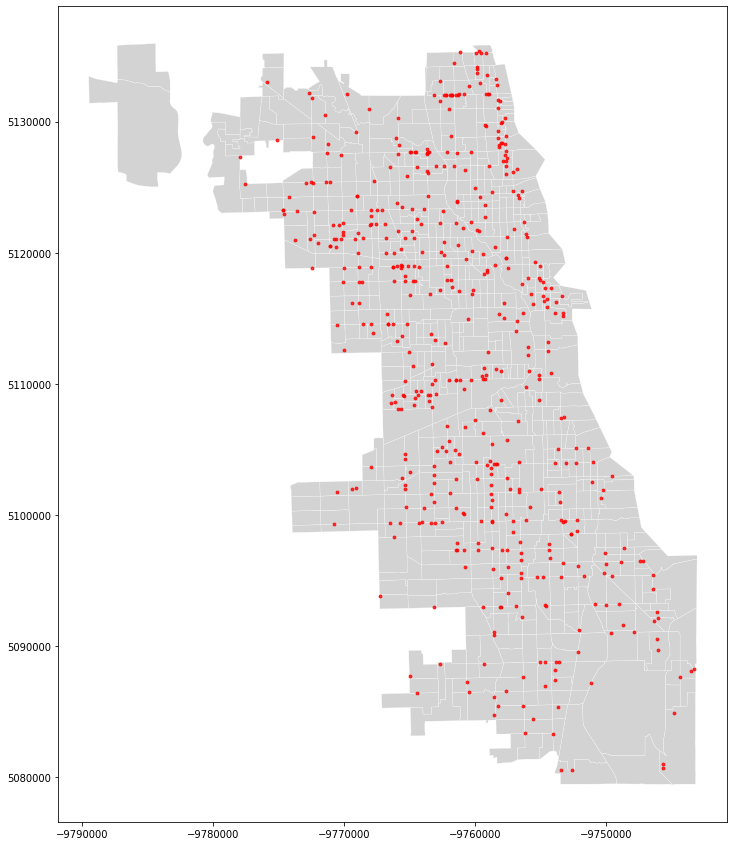

In [70]:
ax = tracts.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
grocery_stores.plot(ax=ax, color='red', markersize=8, alpha = 0.8)

### Buffer erstellen

Wie sieht die Karte aus, wenn wir um jedes Lebensmittelgeschäft einen Kreis von 500 Metern ziehen?

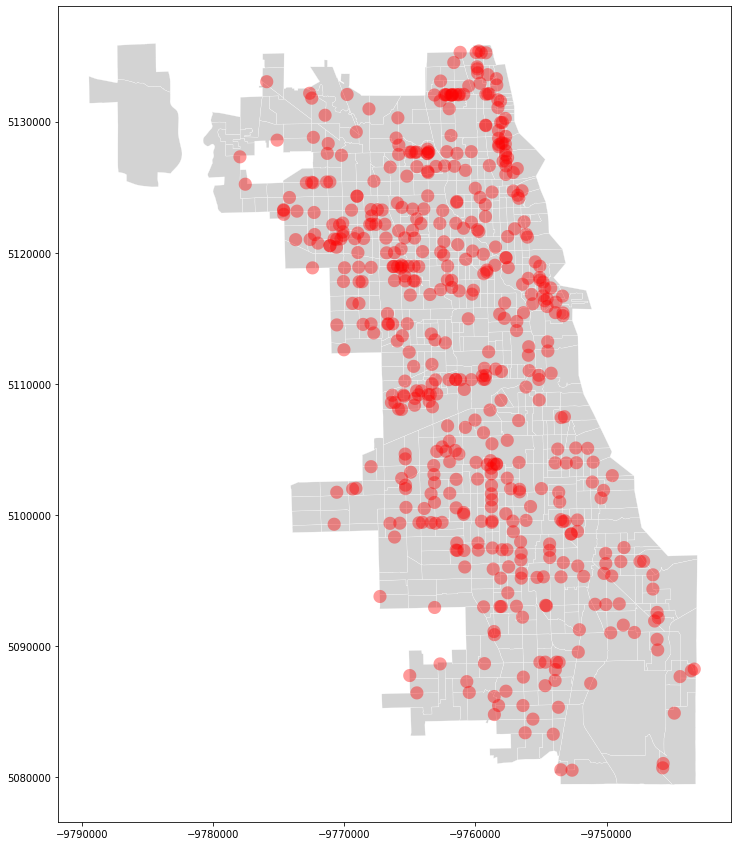

In [71]:
ax = tracts.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
grocery_stores.buffer(500).plot(ax=ax, color='red', markersize=8, alpha=0.4)

### Union

Nächster Schritt: Wir fügen alle Punkte zu einer Fläche zusammen

In [72]:
near_area = grocery_stores.buffer(500).unary_union

Jetzt können wir testen, ob die einzelnen Quartiere diese Fläche berühren

In [73]:
tracts.disjoint(near_area)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26      True
27     False
28     False
29     False
       ...  
771    False
772    False
773    False
774     True
775    False
776    False
777    False
778    False
779    False
780    False
781    False
782     True
783    False
784     True
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792    False
793    False
794    False
795     True
796    False
797    False
798     True
799    False
800    False
Length: 801, dtype: bool

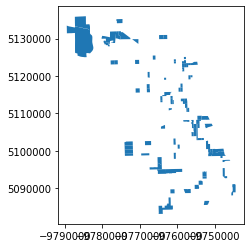

In [74]:
tracts[tracts.disjoint(near_area)].plot()

### Plot

Wir plotten dieselbe Karte wie vorher - und zusätzlich noch jene Tracts, welche die Punktefläche nicht berühren

Text(0.5, 1, 'City tracts that have no grocery store within 500m distance')

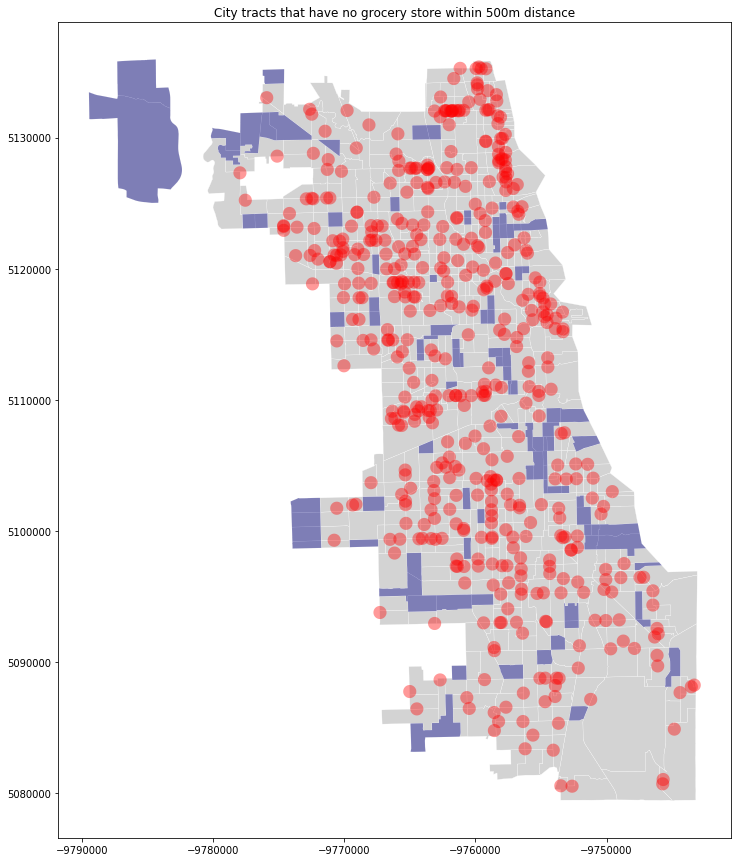

In [75]:
#Bisherige Karte
ax = tracts.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
grocery_stores.buffer(500).plot(ax=ax, color='red', markersize=8, alpha=0.4)

#Neu: Desert-Tracts
tracts[tracts.disjoint(near_area)].plot(ax=ax, color='darkblue', alpha=0.4)

ax.set_title('City tracts that have no grocery store within 500m distance')